In [1]:
!pip install -U anticipy
import logging, sys
logging.disable(sys.maxsize)

     |████████████████████████████████| 74 kB 1.6 MB/s 


In [2]:
!pip install microprediction

     |████████████████████████████████| 73 kB 2.2 MB/s 
     |████████████████████████████████| 503 kB 46.9 MB/s 
     |████████████████████████████████| 50 kB 5.3 MB/s 
     |████████████████████████████████| 59 kB 5.5 MB/s 
     |████████████████████████████████| 15.7 MB 46.9 MB/s 
     |████████████████████████████████| 173 kB 57.1 MB/s 
     |████████████████████████████████| 68 kB 6.8 MB/s 
     |████████████████████████████████| 70 kB 8.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 339 kB 49.2 MB/s 
  Created wheel for contexttimer: filename=contexttimer-0.3.3-py3-none-any.whl size=5818 sha256=e79ad9c1024c3b80c422e692ed6e73dc356901c82d6a26aa197af71d44f28010
  Stored in directory: /root/.cache/pip/wheels/03/8c/3b/8eba5888c3218e78f7fc4442198abb6db2bd1125c1bfcff183
  Created wheel for ordered-set: filename=ordered_set-4.0.2-py2.py3-none-any.whl size=8219 sha256=df9f7efdadeb4657bc41fdc28b5df159c16ea42a3c3b7c10d10efde91a38221

### anticipy hello world
See https://www.microprediction.com/blog/popular-timeseries-packages for more packages

In [10]:
from microprediction import MicroReader
mr = MicroReader()
YS = mr.get_lagged_values(name='btc_raw.json')[:400]

In [11]:
import pandas as pd 
import datetime 
import numpy as np
from anticipy import forecast


def anticipy_next(ys:[float])->float:
   """ Predict the next point in a series """

   df = pd.DataFrame({'y': ys,
                   'date':pd.date_range(start='2021-01-01', periods=len(ys), freq='D')})
   df_forecast = forecast.run_forecast(df, extrapolate_years=1)
   return (df_forecast.q80.tail(1) + df_forecast.q20.tail(1)) / 2
   
def run(ys):
  """ Slow, see river package or others if you don't like """
  burnin = 10
  y_hats = list()
  for t in range(len(ys)):
     if t>burnin:
        y_hat = anticipy_next(ys[:t])
     elif t>=1:
        y_hat = ys[t-1]
     else:
        y_hat = 0 
     y_hats.append(y_hat)
  return y_hats 

In [12]:
XS = run(YS)

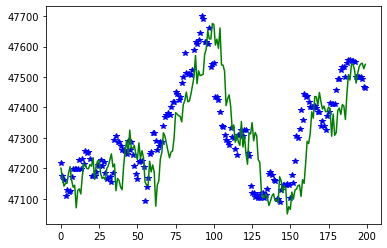

In [15]:
import matplotlib.pyplot as plt
plt.plot(YS[200:400],'*b')
plt.plot(XS[200:400],'g')